In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact 

df = pd.read_csv('Income.csv')
pd.set_option('display.max_columns', 500)

#### A) Data Exploration

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Find null values in all columns

df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### B) Data Pre-processing

1. Pandas: get_dummies method

In [7]:
df_pandas = df.copy()

# Equvilant to sklearn's one-hot encoding
dummy_workclass = pd.get_dummies(df_pandas['workclass']).add_prefix('workclass_')
dummy_education = pd.get_dummies(df_pandas['education']).add_prefix('education_')
dummy_marital_status = pd.get_dummies(df_pandas['marital-status']).add_prefix('marital-status_')
dummy_occupation = pd.get_dummies(df_pandas['occupation']).add_prefix('occupation_')
dummy_relationship = pd.get_dummies(df_pandas['relationship']).add_prefix('relationship_')
dummy_race = pd.get_dummies(df_pandas['race']).add_prefix('race_')
dummy_native_country = pd.get_dummies(df_pandas['native-country']).add_prefix('native_')

df_pandas = pd.concat([df_pandas, 
             dummy_workclass, 
             dummy_education, 
             dummy_marital_status, 
             dummy_occupation, 
             dummy_relationship,
             dummy_race,
             dummy_native_country], axis=1)

df_pandas = df_pandas.drop(['workclass',
                            'education',
                            'marital-status',
                            'occupation',
                            'relationship',
                            'race',
                            'native-country'], axis=1)

# Label Encoding for Gender & income
df_pandas['gender'] = df_pandas['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_pandas['income'] = df_pandas['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Drop irrelevant columns
df_pandas = df_pandas.drop(['capital-gain',
                            'capital-loss'], 
                           axis=1
                           )

df_pandas['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

<Axes: xlabel='capital-loss', ylabel='Count'>

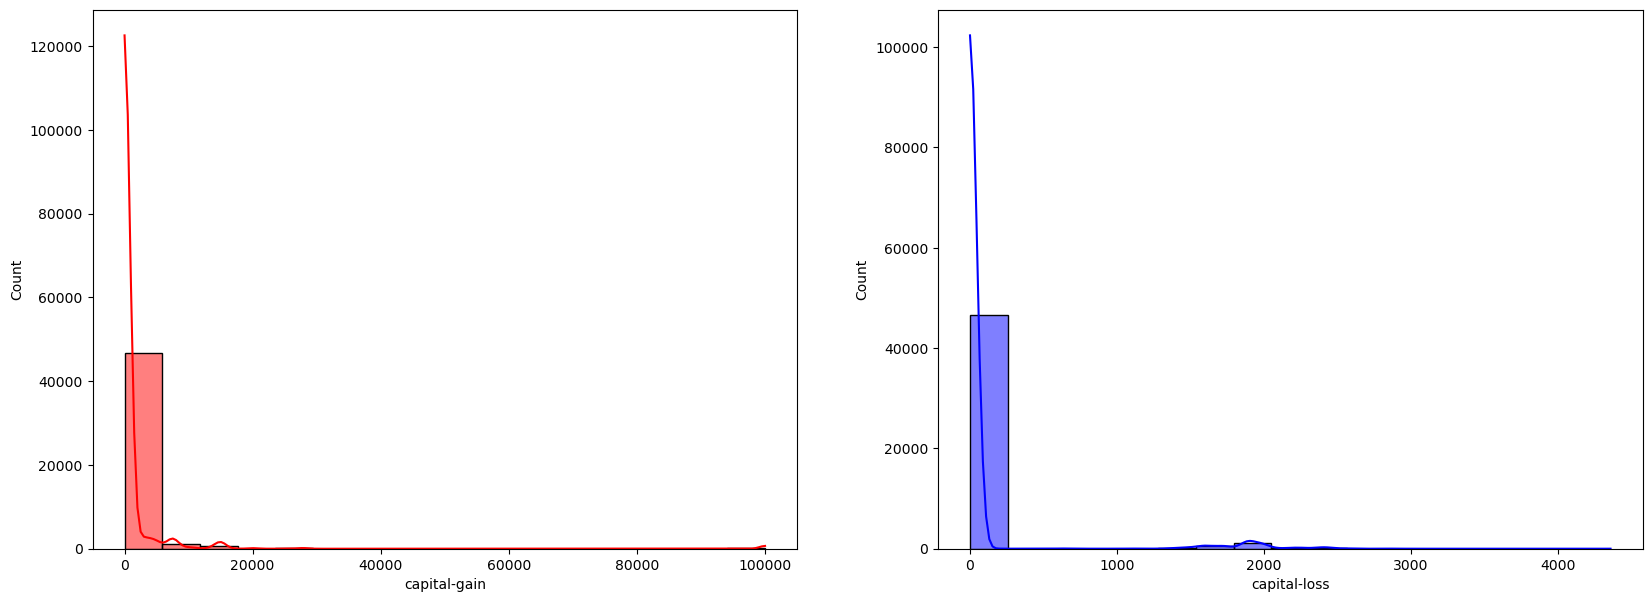

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(df['capital-gain'], kde=True, color='r')
plt.subplot(1,2,2)
sns.histplot(df['capital-loss'], kde=True, color='b')

2. Sklearn: one-hot encoding & label-encoding method

    1. Label_Encoding = use for LABELS, not features
    2. One-hot Encoding = use for categorical features, arrange features in alphabetical order 
    3. Ordinal Encoding = use to order categories within features 


In [9]:
from sklearn import preprocessing

df_le = df.copy()

label_encoder = preprocessing.LabelEncoder()

# Use label_encoding on multiclass variables 
df_le['workclass'] = label_encoder.fit_transform(df_le['workclass'])
df_le['gender'] = label_encoder.fit_transform(df_le['gender'])
df_le['education'] = label_encoder.fit_transform(df_le['education'])
df_le['marital-status'] = label_encoder.fit_transform(df_le['marital-status'])
df_le['occupation'] = label_encoder.fit_transform(df_le['occupation'])
df_le['relationship'] = label_encoder.fit_transform(df_le['relationship'])
df_le['race'] = label_encoder.fit_transform(df_le['race'])
df_le['native-country'] = label_encoder.fit_transform(df_le['native-country'])
df_le['income'] = label_encoder.fit_transform(df_le['income'])

# Drop irrelevant columns
df_le = df_le.drop(['capital-gain', 'capital-loss'], axis=1)

df_le

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,20,39,0


In [16]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

df_ohe = df.copy()

one_hot_encoder = preprocessing.OneHotEncoder()

columns = ['workclass',
            'education',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'native-country']

# Use One-hot encoding on multiclass variables
column_trans = make_column_transformer(
    (one_hot_encoder, columns), 
     remainder='passthrough',
     sparse_threshold=0
)

df_ohe = column_trans.fit_transform(df_ohe)
df_ohe

array([[0.0, 0.0, 0.0, ..., 0, 40, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0, 50, '<=50K'],
       [0.0, 0.0, 1.0, ..., 0, 40, '>50K'],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 40, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0, 20, '<=50K'],
       [0.0, 0.0, 0.0, ..., 0, 40, '>50K']], dtype=object)

#### C) Data Exploration

1. Pandas get_dummy method

In [11]:
# Narrowing down the variables with significant correlations (Top 20% Highest Correaltion)

# Find the correlation score in the 'income' columns
df_corr = df_pandas.corr()['income'].abs()

sorted_corr = df_corr.sort_values()
num_to_drop = int(0.8 * len(sorted_corr))
col_to_drop = sorted_corr.iloc[:num_to_drop].index
df_pandas_drop = df_pandas.drop(col_to_drop, axis=1)
df_pandas_drop

,age,educational-num,gender,hours-per-week,income,workclass_Self-emp-inc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,38,9,1,50,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2,28,12,1,40,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,44,10,1,40,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,18,10,0,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,38,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
48838,40,9,1,40,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
48839,58,9,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,20,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Correlation Matrix')

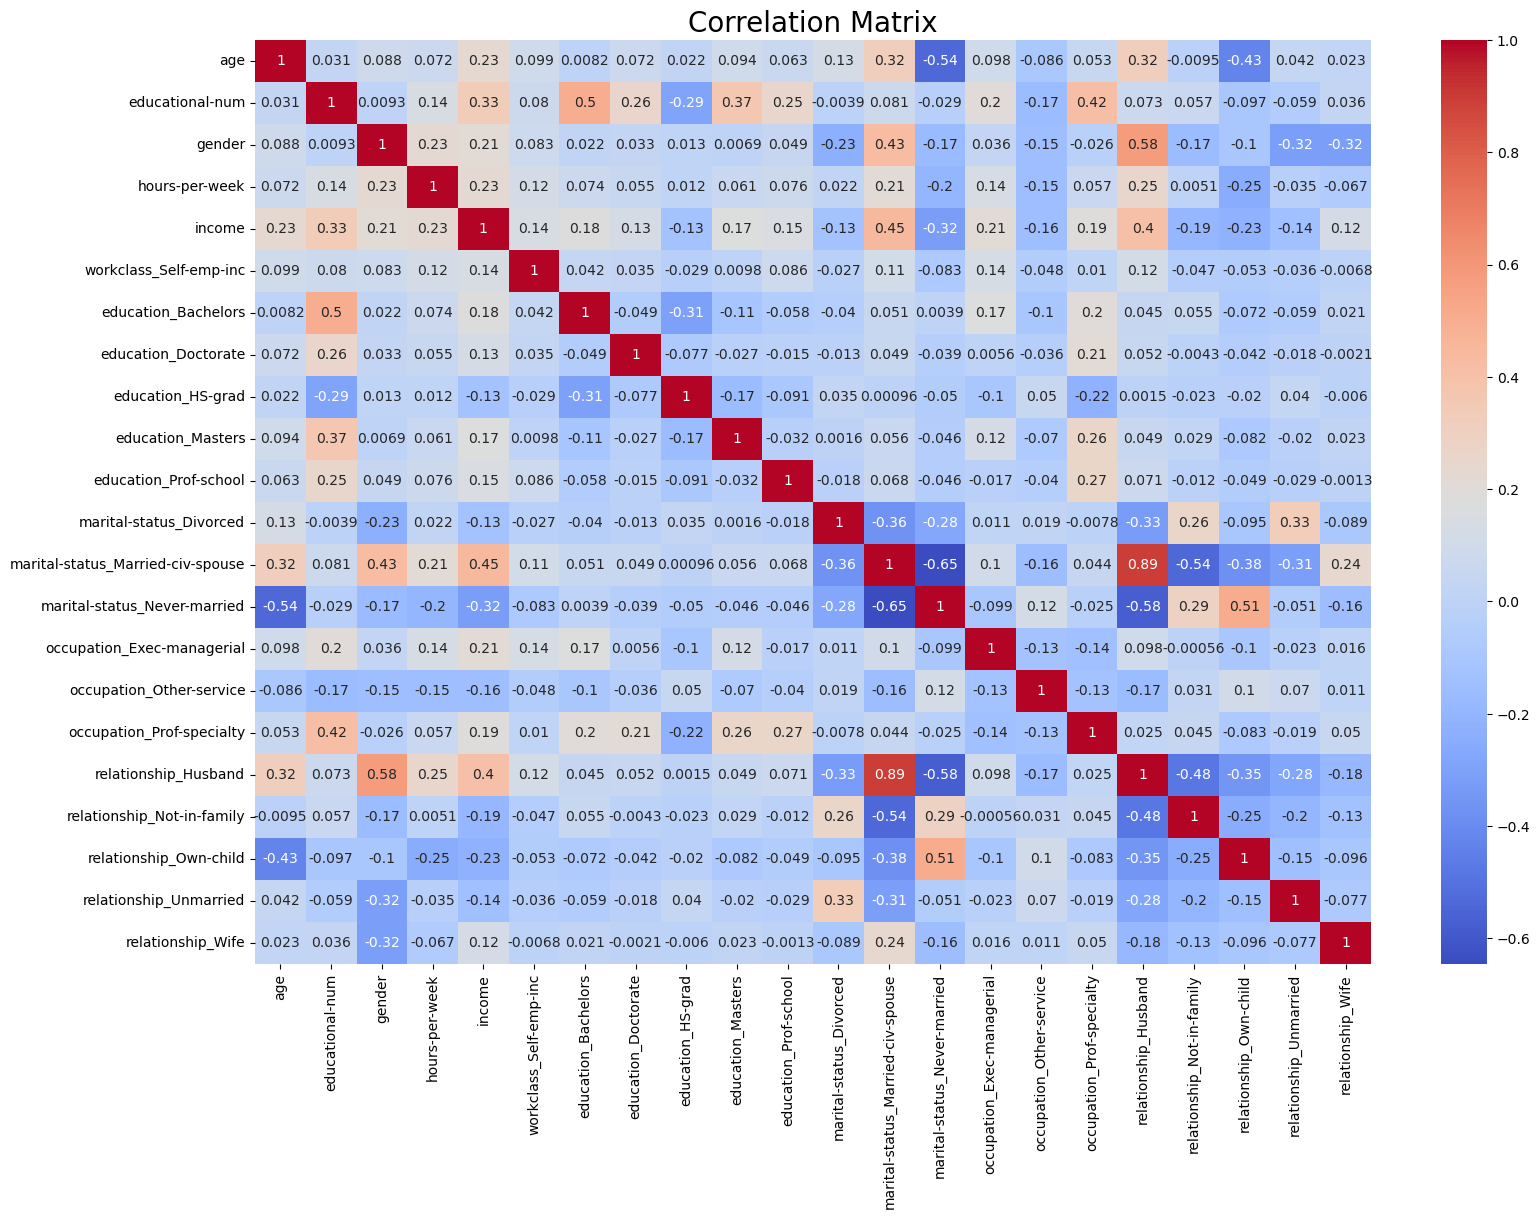

In [12]:
fig, ax = plt.subplots(figsize = [18,12])
sns.heatmap (df_pandas_drop.corr(),
             annot = True,
             cmap = 'coolwarm',
             ax = ax
             )

ax.set_title("Correlation Matrix", fontsize = 20)


Looking at the income column, we can see some noticeable correaltions:

    1. Education Number, Marital_status(married spouse), relationship_Husband --> highly Postively Correlated with income 
    2. Marital_status(Never-married) --> Negatively Correlated with income 

2. Label Encoding Method

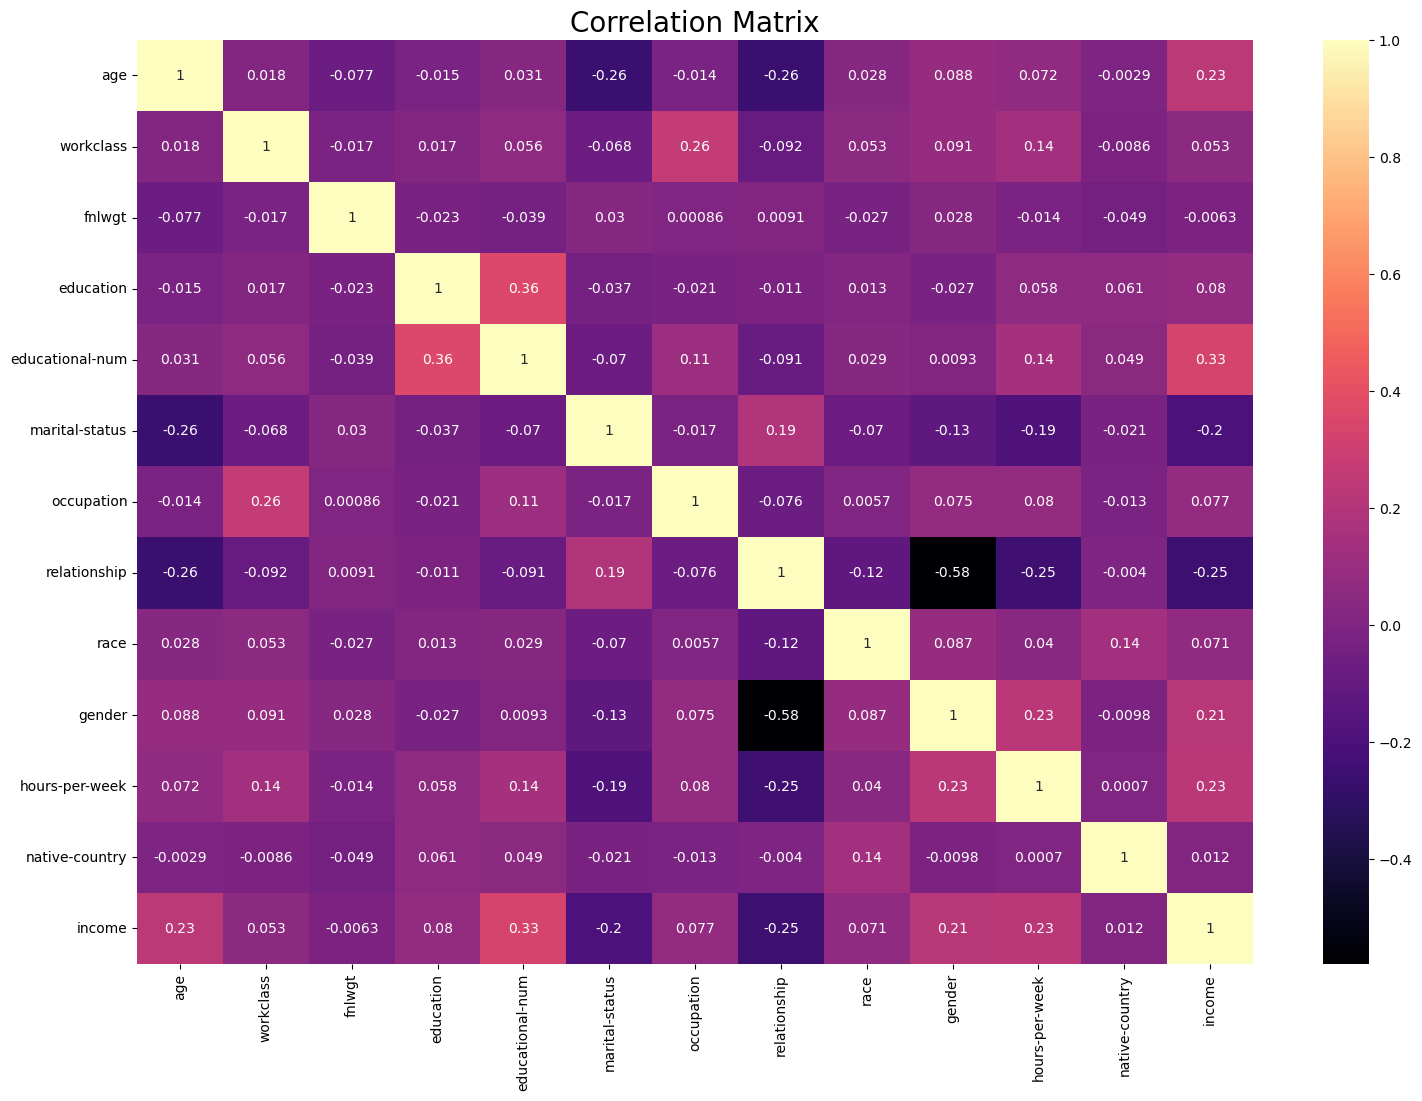

In [13]:
fig, ax = plt.subplots(figsize = [18,12])
sns.heatmap(df_le.corr(),
            annot = True,
            cmap='magma',
            ax = ax
            )
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

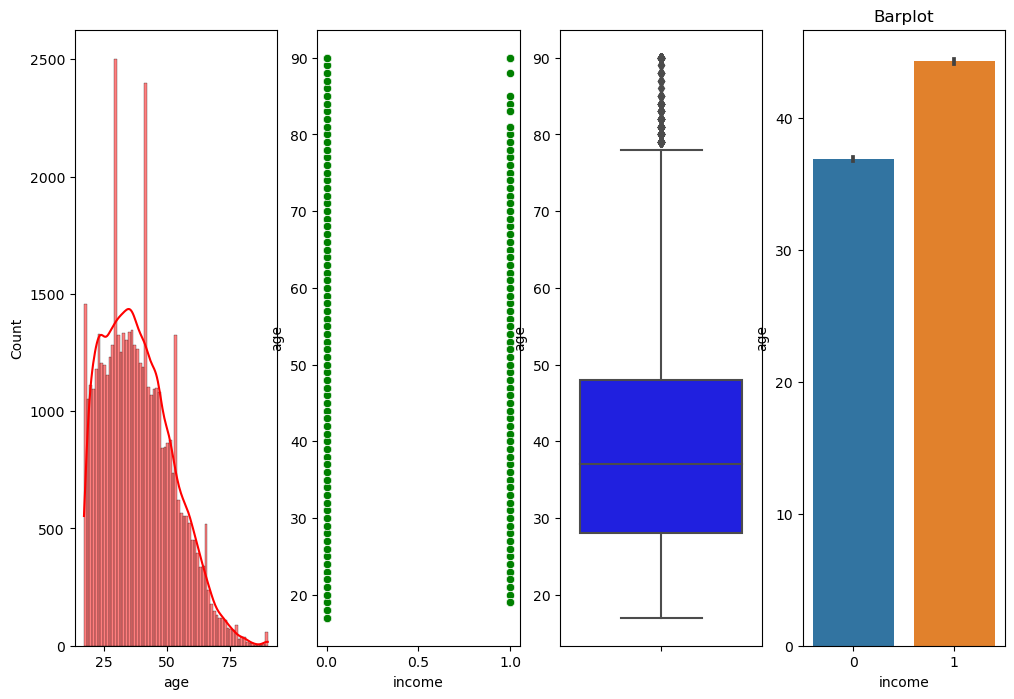

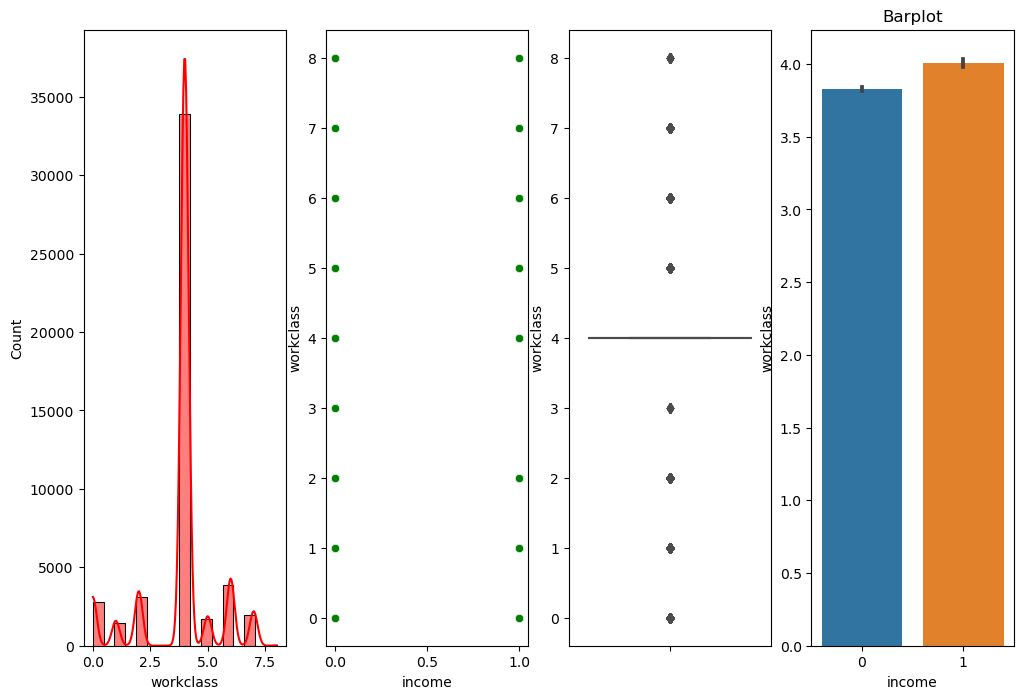

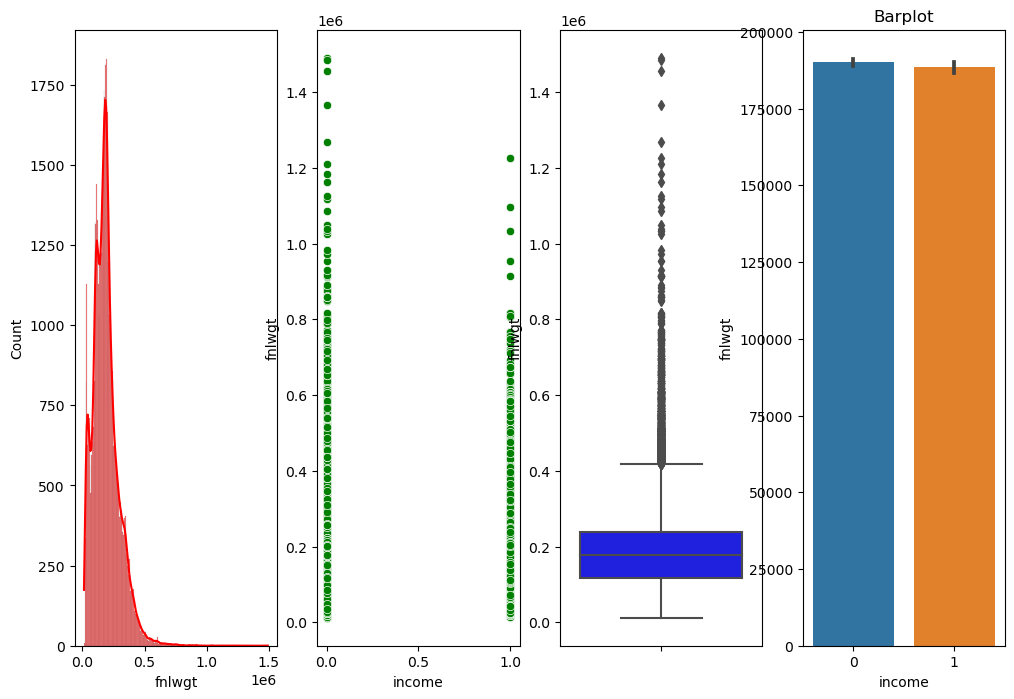

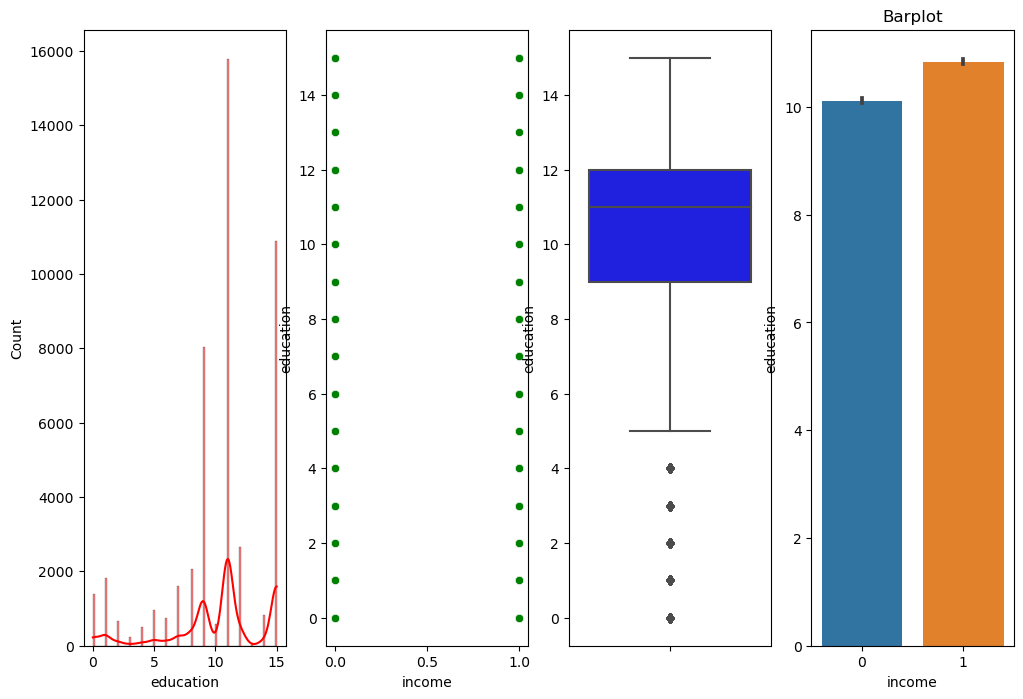

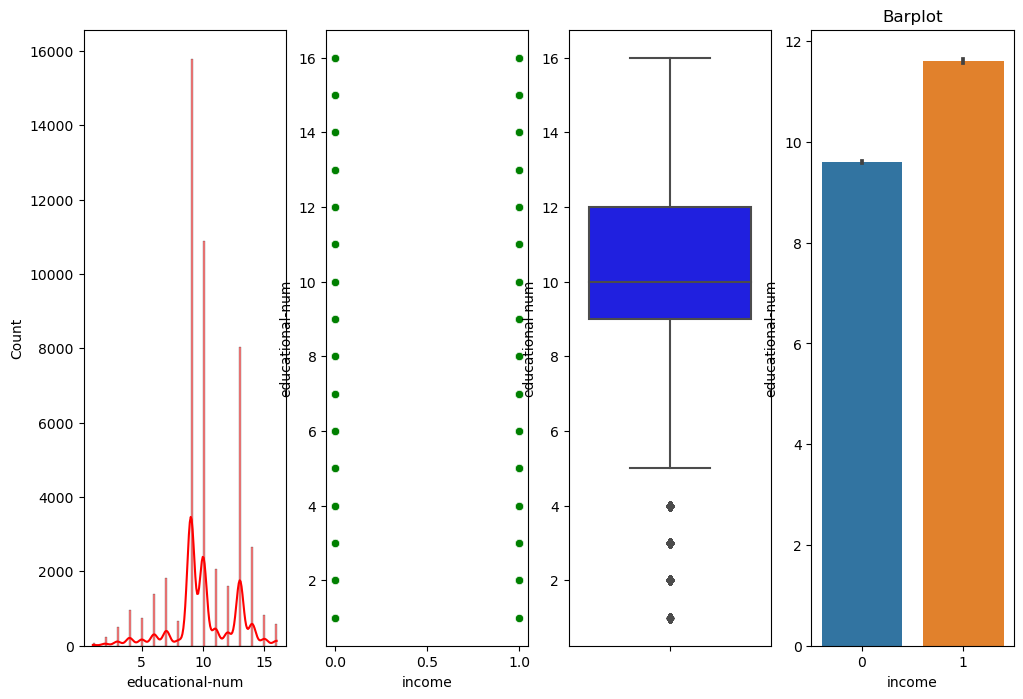

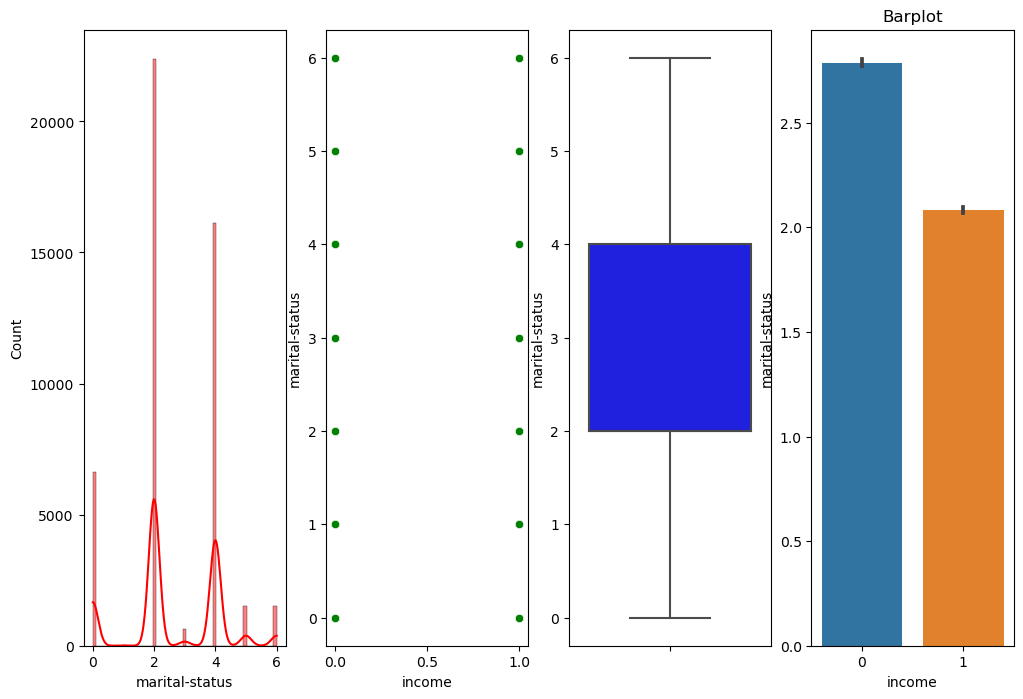

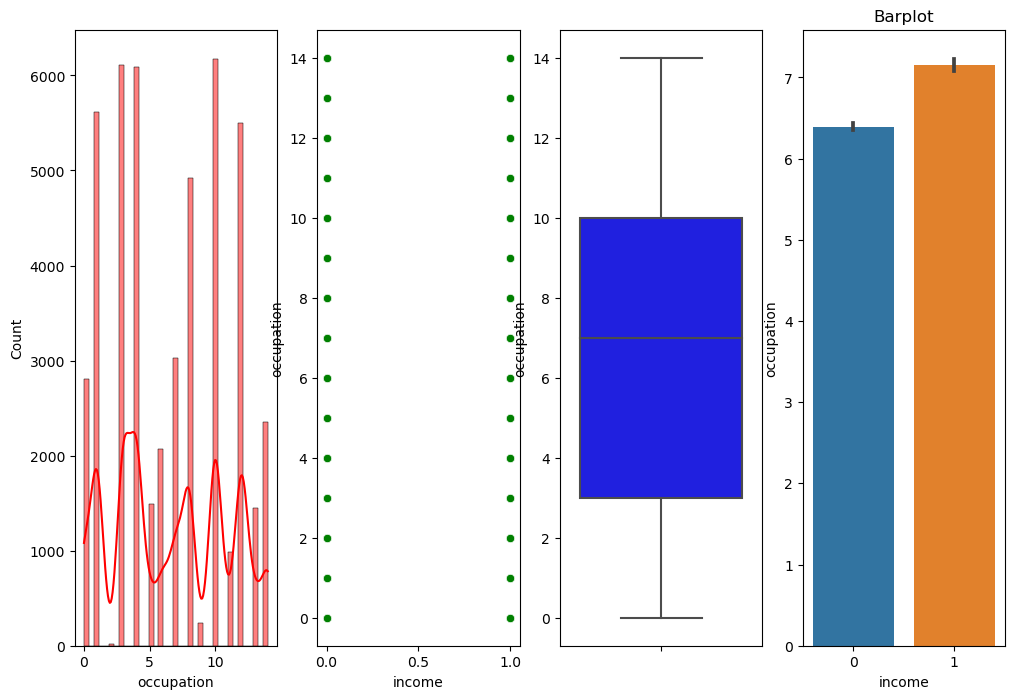

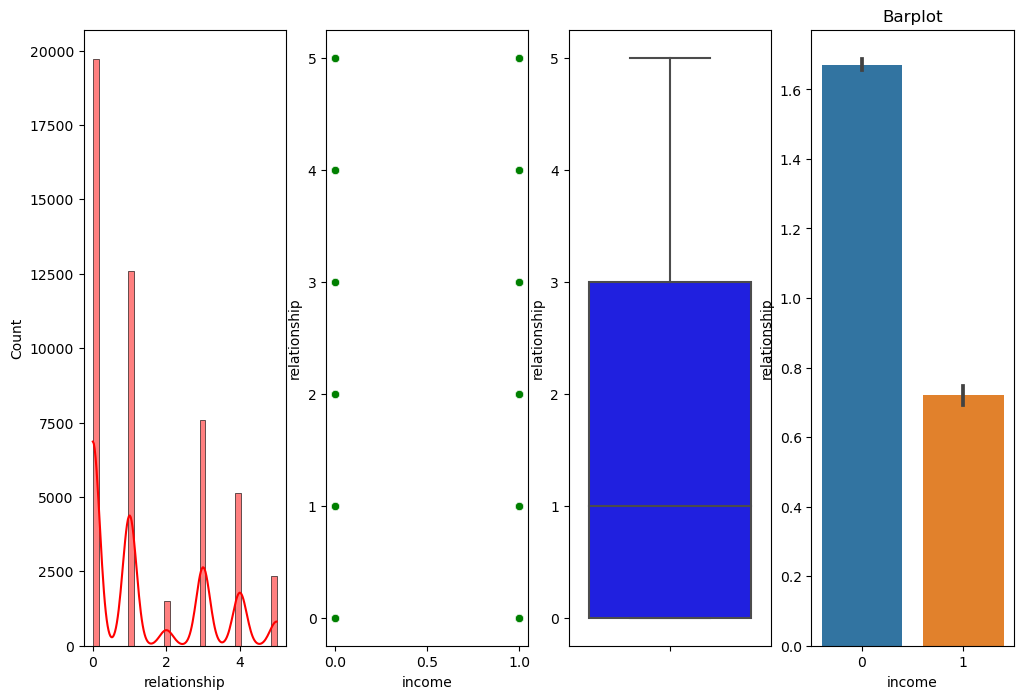

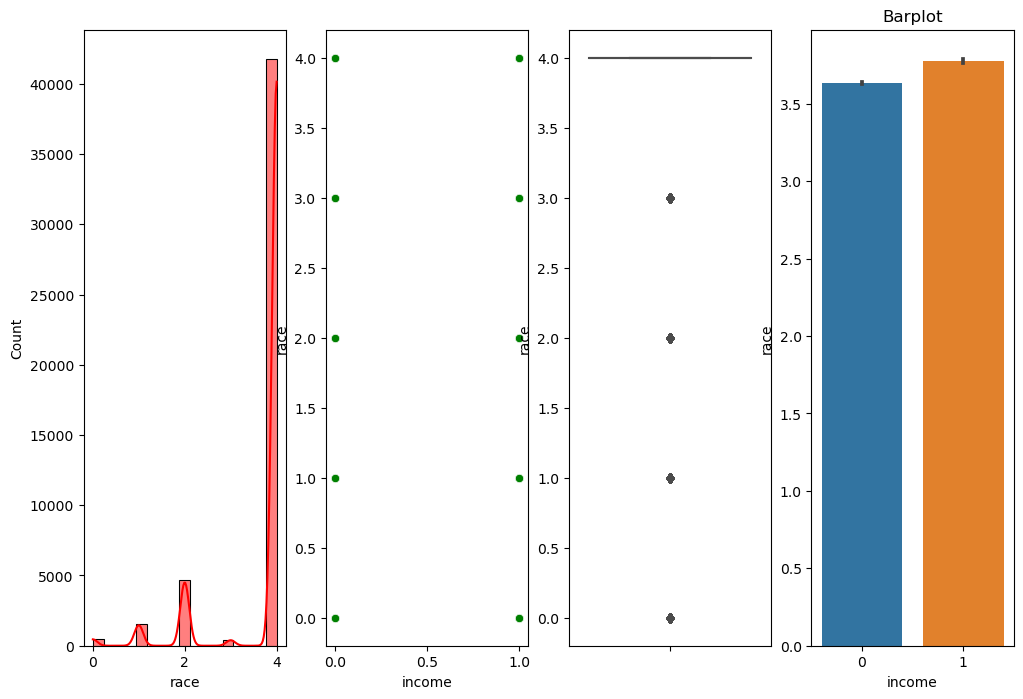

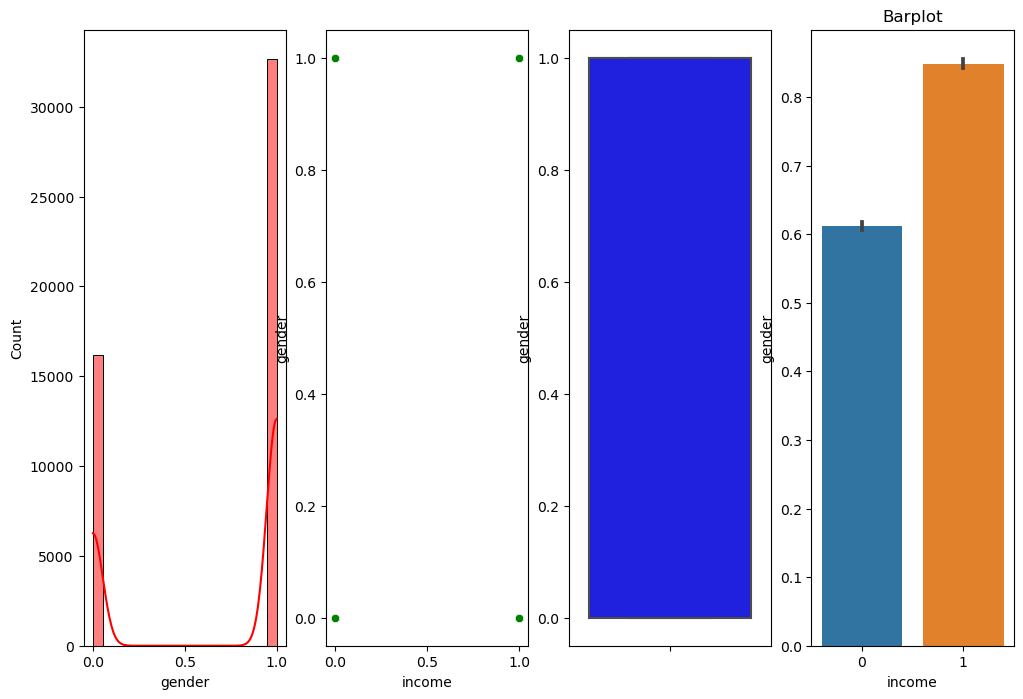

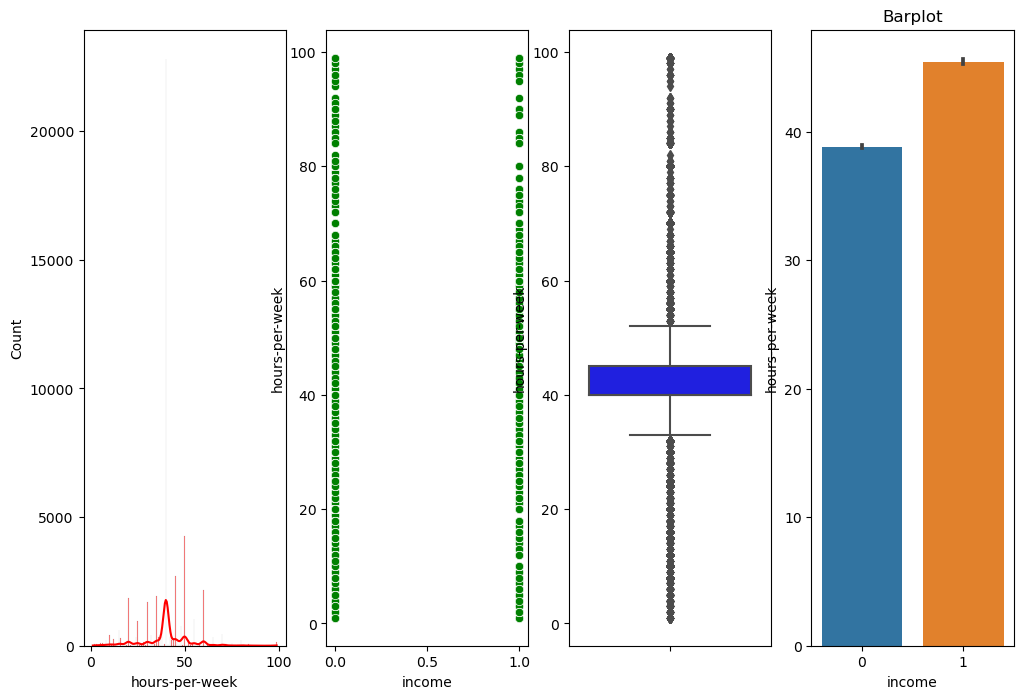

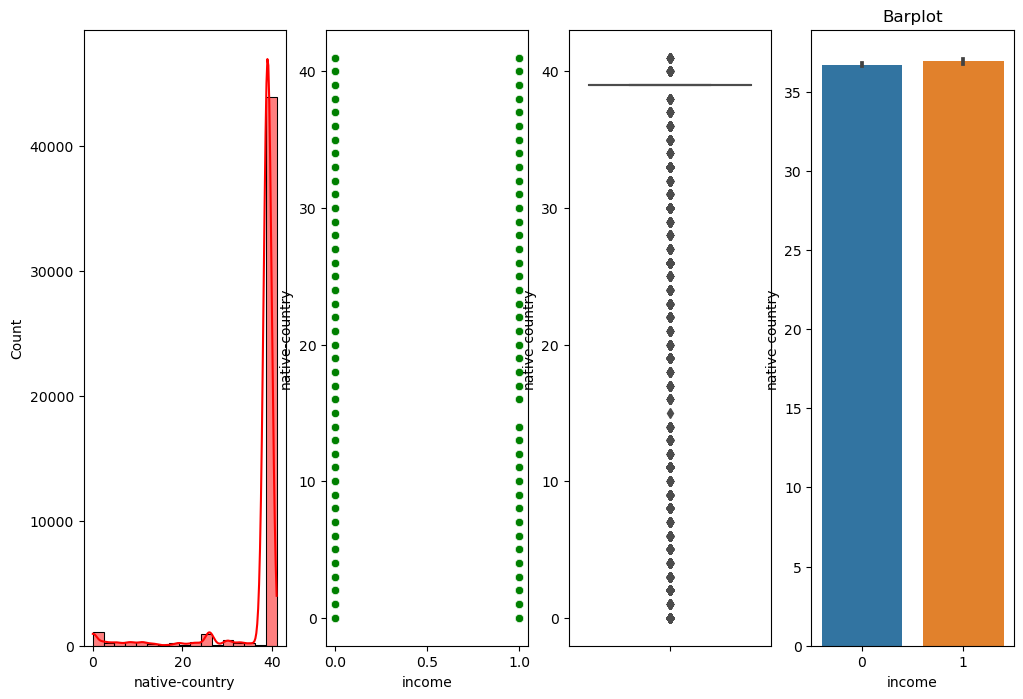

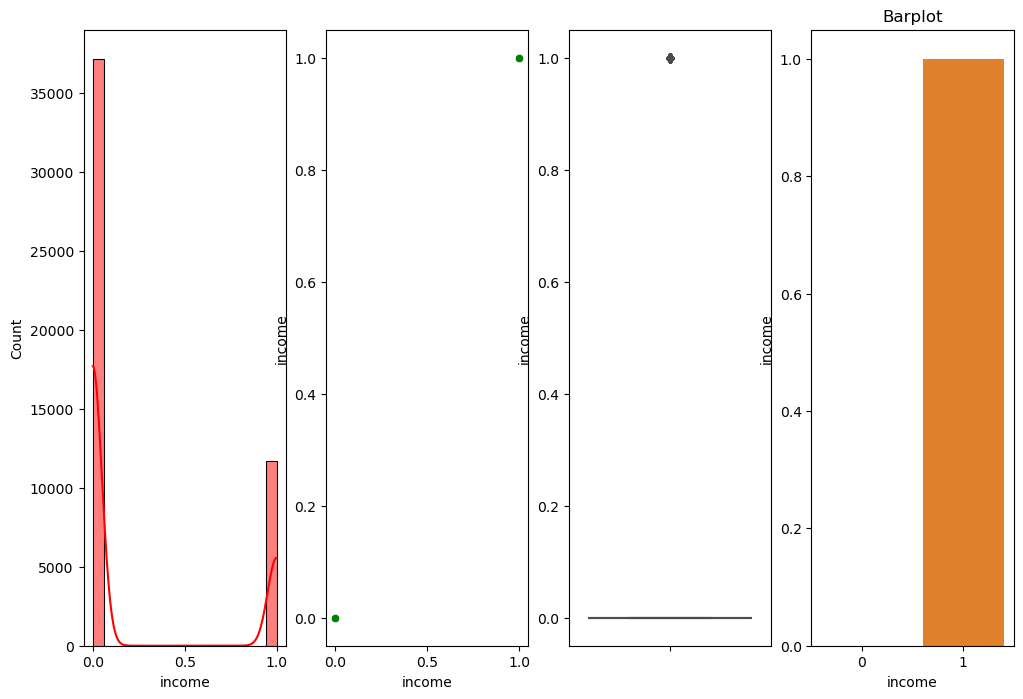

In [15]:
def diagonostic_plots(df, variable, target):
    # Function Takes -> DataFrame + Target variable -> as arguement 
    
    # Define figsize 
    fig, axes = plt.subplots (1,4, figsize = (12,8))
    
    # Histogram
    sns.histplot(data = df,
                 x = df[variable],
                 kde = True,
                 color = 'r',
                 ax = axes[0])
    plt.title('Histogram')

    # Scatterplot 
    sns.scatterplot(data = df,
                    y = df[variable], 
                    x = df[target],
                    color = 'g',
                    ax = axes[1])
    
    plt.title('Scatterplot')
    
    # Boxplot 
    sns.boxplot(data = df,
                y = df [variable],
                color = 'b',
                ax = axes[2])
    
    plt.title('Boxplot')
    
    # Barplot
    sns.barplot(data = df,
                x = target,
                y = variable,
                ax = axes[3])
    
    plt.title('Barplot')
    
    plt.show
    
# Apply the function across all column of the DataFrame
for col in df_le:
    diagonostic_plots(df=df_le, variable=col, target='income')

#### Machine Learning Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Split Dataset into Input X and Output Y
X_df = df_le.drop(['income'], axis=1)
y_df = df_le['income']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=1)

print(f"X_train:", X_train.shape)
print(f"y_train:", y_train.shape)
print(f"X_test:", X_test.shape)
print(f"y_test:", y_test.shape)


X_train: (39073, 12)
y_train: (39073,)
X_test: (9769, 12)
y_test: (9769,)


In [51]:
# Data Scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [67]:
# GridSearchCV Method 

Knn = KNeighborsClassifier()

value = range(1,31)
parameters = {'n_neighbors': value}
knn_grid = GridSearchCV(estimator = Knn,
                        param_grid = parameters,
                        scoring ='accuracy',
                        cv = 10,
                        verbose = 1,
                        n_jobs = -1
                        )

knn_grid.fit(X_train_scaled, y_train)

# Full GridSearchCV Result in Pandas dataframe
cv_result_df = pd.DataFrame(knn_grid.cv_results_)
final_result = cv_result_df.pivot_table(index=['rank_test_score','param_n_neighbors'],
                                        values='mean_test_score'
                                        )

final_result

Fitting 10 folds for each of 30 candidates, totalling 300 fits


,,mean_test_score
rank_test_score,param_n_neighbors,
1,28,0.830318
2,30,0.829601
3,29,0.829550
4,20,0.829422
5,26,0.829371
6,24,0.829319
7,18,0.829217
8,22,0.829115
9,25,0.829063


In [1]:
from sklearn.metrics import recall_score, precision_score

knn_accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)
print(f"Accuracy score: {knn_accuracy:.2f}")

NameError: name 'knn_grid' is not defined